<a href="https://colab.research.google.com/github/gillis42/csv_loc/blob/master/PUBLIC_How_is_Sherpa_LTE1_doing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Process and plot TLE DATA for Sherpa LTE1 using 
searchingforsherpaman@gmail.com

SherpaLTE1_July2021

Sherpa-LTE1 noad_cat_id = 48941

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks


[]

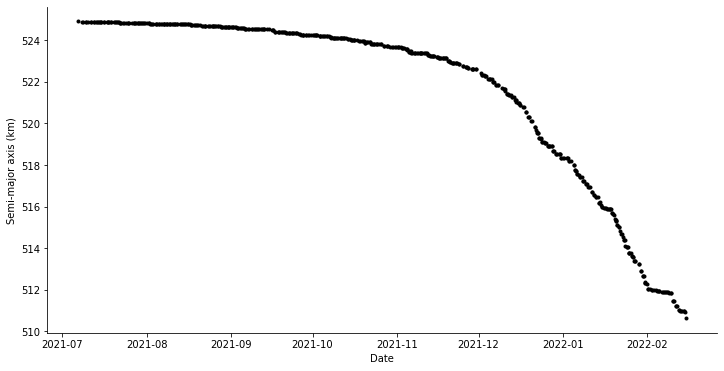

In [6]:
import sys
import re
import csv
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
from google.colab import drive
import os

#@title Require email and password from https://www.space-track.org 
sat_email = 'searchingforsherpaman@gmail.com' #@param {type:"string"}
sat_password = 'SherpaLTE1_July2021' #@param {type:"string"}
satellite_norad_cat_id = 48941 #@param {type:"integer"}


drive.mount('/content/gdrive')
%cd "/content/gdrive/My Drive/Colab Notebooks/"

# Install and loginto Spacetrack app (note, they do restrict logins so you can get blocekd)
!pip install spacetrack
import spacetrack.operators as op
from spacetrack import SpaceTrackClient
import spacetrack.operators as op

#Matthew login
st = SpaceTrackClient(identity=sat_email, password=sat_password)

# Streaming downloads line by line
# 48941 is SHERPA LTE1
lines = st.tle(iter_lines=True, norad_cat_id=Satellite_norad_cat_id, format='kvn')
with open('kvn.txt', 'w') as fp:
    for line in lines:
        fp.write(line + '\n')

# Extract data from files using bash
!grep 'MEAN_MOTION                        =' kvn.txt > MEANMOTION.txt
!grep 'EPOCH                              =2' kvn.txt > EPOCH.txt
!sed -i 's:.*=::' MEANMOTION.txt 
!sed -i 's:.*=::' EPOCH.txt 

# Process files to get Semi Major axis data (this is the only value we need)
filename = '/content/gdrive/My Drive/Colab Notebooks/'
data_tle = pd.read_csv(filename + 'MEANMOTION.txt')
data_epoch = pd.read_csv(filename + 'EPOCH.txt')
data = pd.concat([data_epoch, data_tle], axis=1)
data.columns = ['Date', 'Mean Motion'] 
data["Date"] = pd.to_datetime(data['Date'])#, unit='s')
data['rad per s'] = data['Mean Motion']*((2*np.pi)/86400)
data['Semi-major axis'] = (((398600.4418)**(1/3))/(data['rad per s']**(2/3)))-6378.137 

# Plot
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(data['Date'], data['Semi-major axis'], color='0', marker='o', markersize=3, ls='')


ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylabel('Semi-major axis (km)', fontsize=10)
ax.set_xlabel('Date', fontsize=10)

plt.plot()